In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', category=UserWarning)

import os
import sys
sys.path.append('C:\\Users\\yu886\\OneDrive\\デスクトップ\\github\\Sony\\src')

from Processing.load_dataset import Load_dataset
from Processing.processing import Split, Valid, Submission
from Engineering.enginnering import engin

In [2]:
train, test = Load_dataset()

In [6]:
train.columns
col = ['co_cnt',
       'co_min', 'co_mid', 'co_max', 'co_var', 'o3_cnt', 'o3_min', 'o3_mid',
       'o3_max', 'o3_var', 'so2_cnt', 'so2_min', 'so2_mid', 'so2_max',
       'so2_var', 'no2_cnt', 'no2_min', 'no2_mid', 'no2_max', 'no2_var',
       'temperature_cnt', 'temperature_min', 'temperature_mid',
       'temperature_max', 'temperature_var', 'humidity_cnt', 'humidity_min',
       'humidity_mid', 'humidity_max', 'humidity_var', 'pressure_cnt',
       'pressure_min', 'pressure_mid', 'pressure_max', 'pressure_var',
       'ws_cnt', 'ws_min', 'ws_mid', 'ws_max', 'ws_var', 'dew_cnt', 'dew_min',
       'dew_mid', 'dew_max', 'dew_var']

In [13]:
print(len(test.Country.unique()))
test.Country.unique()

30


array(['Australia', 'Belgium', 'Bosnia and Herzegovina', 'Brazil',
       'Canada', 'Chile', 'China', 'Croatia', 'France', 'Hungary',
       'India', 'Israel', 'Japan', 'Mexico', 'Netherlands', 'Poland',
       'Russia', 'Serbia', 'South Africa', 'South Korea', 'Spain',
       'Taiwan', 'Thailand', 'Turkey', 'United Kingdom', 'United States',
       'Vietnam', 'Iran', 'Germany', 'Italy'], dtype=object)

In [53]:
index = []
a = list(train[(train["co_min"]>=250)].index)
b = list(train[(train["co_mid"]>=200)].index)
c = list(train[(train["o3_mid"]>=200)].index)
d = list(train[(train["so2_min"]>=150)].index)
e = list(train[(train["so2_mid"]>=200)].index)
f = list(train[(train["no2_min"]>=100)].index)
g = list(train[(train["no2_mid"]>=400)].index)
h = list(train[(train["temperature_min"]>=40)].index)
i = list(train[(train["ws_mid"]>=40)].index)
j = list(train[(train["dew_var"]>=1400)].index)
index = a+b+c+d+e+f+g+h+i+j
index = list(set(index))
index
train.drop(index=index, axis=1)

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,...,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,...,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,...,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,...,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195936,195937,2021,12,31,United States,Jacksonville,30.33218,-81.65565,12,0.694,...,2.195,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252,16.150
195937,195938,2021,12,31,United States,Las Vegas,36.17497,-115.13722,14,0.528,...,1.002,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078,16.895
195938,195939,2021,12,31,United States,Milwaukee,43.03890,-87.90647,171,1.975,...,0.994,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286,86.299
195939,195940,2021,12,31,Vietnam,Hanoi,21.02450,105.84117,31,2.613,...,1.005,3.058,6.005,6.085,51,1.922,7.443,7.716,4.642,36.523


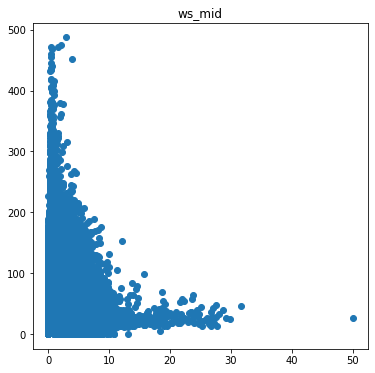

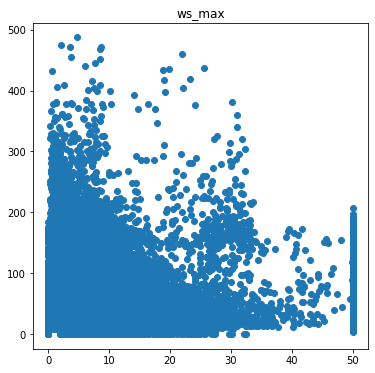

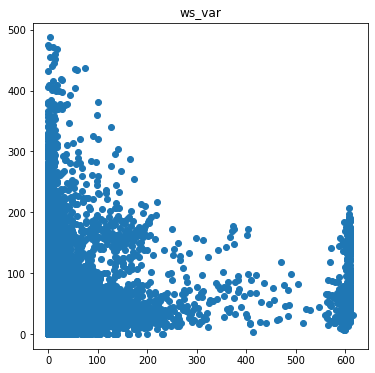

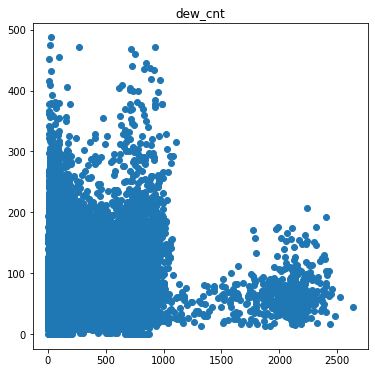

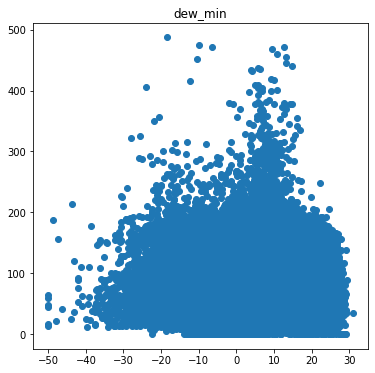

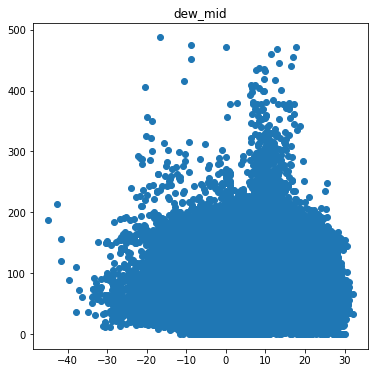

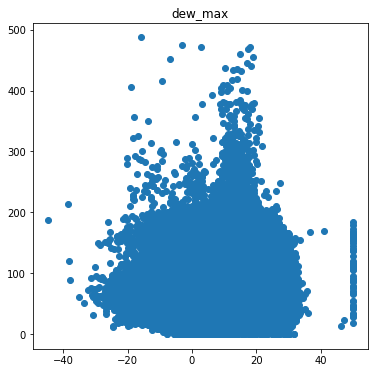

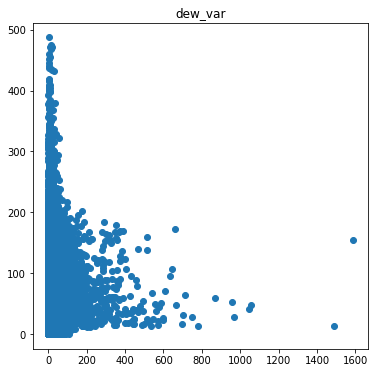

In [26]:
col = ['ws_mid', 'ws_max', 'ws_var', 'dew_cnt', 'dew_min',
       'dew_mid', 'dew_max', 'dew_var']
for i in col:
    plt.figure(figsize=(6,6))
    plt.scatter(train[i], train["pm25_mid"])
    plt.title(i)
    plt.show()